In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ADBE', 'ADYEY', 'AMD', 'AMZN', 'ANET',
    'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'DDOG', 'DOCS', 'DOCU',
    'DUOL', 'EDIT', 'ETSY', 'FLGT', 'GH', 'GMED', 'GOOG', 'INTG',
    'ISRG', 'JD', 'LSPD', 'LULU', 'MDB', 'MELI', 'MNST', 'MSFT', 'MTCH',
    'NVCR', 'NVDA', 'OKTA', 'OPEN', 'PANW', 'PAYC', 'PINS', 'QDEL',
    'RBLX', 'RDFN', 'RGEN', 'RIVN', 'ROKU', 'RVLV', 'SE', 'SHOP',
    'SNOW', 'TASK', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO', 'TWLO',
    'TWTR', 'UPST', 'VEEV', 'VLD', 'XPEV', 'ZEN', 'ZM']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

64

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-08-06', datetime.date(2022, 8, 6))

In [4]:
batch = SYMBOLS + INDICES # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  67 of 67 completed
Generating derived columns...
   ...AAPL
   ...ABMD
   ...ABNB
   ...ADBE
   ...ADYEY
   ...AMD
   ...AMZN
   ...ANET
   ...ASML
   ...AXON
   ...BROS
   ...BYND
   ...CHWY
   ...DDOG
   ...DOCS
   ...DOCU
   ...DUOL
   ...EDIT
   ...ETSY
   ...FLGT
   ...GH
   ...GMED
   ...GOOG
   ...INTG
   ...ISRG
   ...JD
   ...LSPD
   ...LULU
   ...MDB
   ...MELI
   ...MNST
   ...MSFT
   ...MTCH
   ...NVCR
   ...NVDA
   ...OKTA
   ...OPEN
   ...PANW
   ...PAYC
   ...PINS
   ...QDEL
   ...RBLX
   ...RDFN
   ...RGEN
   ...RIVN
   ...ROKU
   ...RVLV
   ...SE
   ...SHOP
   ...SNOW
   ...TASK
   ...TDOC
   ...TEAM
   ...TREX
   ...TTD
   ...TTWO
   ...TWLO
   ...TWTR
   ...UPST
   ...VEEV
   ...VLD
   ...XPEV
   ...ZEN
   ...ZM
   ...^GSPC
   ...^IXIC
   ...^NYA


In [5]:
data['Date'].tail()

2512   2022-08-01
2513   2022-08-02
2514   2022-08-03
2515   2022-08-04
2516   2022-08-05
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       1.005107
2       1.000621
3       1.000414
4       1.002188
5       0.998748
          ...   
2512    0.997177
2513    0.993338
2514    1.015638
2515    0.999223
2516    0.998374
Name: ^GSPC, Length: 2516, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.017791
2,1.002913
3,1.005703
4,1.002462
5,1.012903
...,...
2512,1.014800
2513,1.028816
2514,1.052473
2515,1.019547


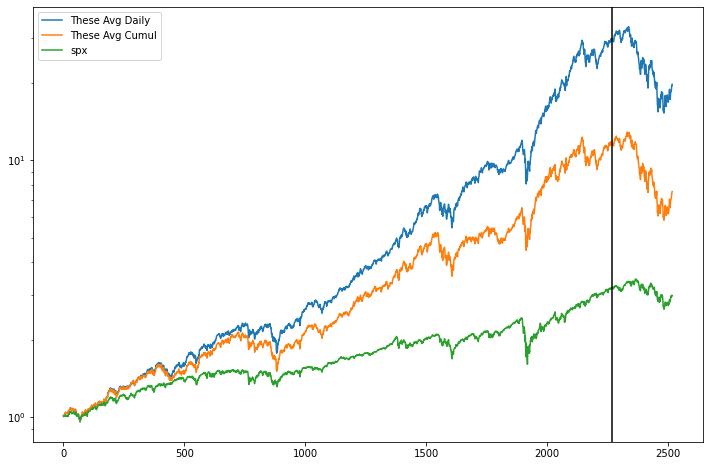

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
         label='These Avg Daily')
plt.plot(data['DayToDayChange'].cumprod().mean(axis=1),
         label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-08-06,NaN,NaN
1,2012-08-07,1.014798,1.014798
2,2012-08-08,1.015632,1.015491
3,2012-08-09,1.014263,1.014015
4,2012-08-10,1.012036,1.012175


In [10]:
out.tail()

,Date,mine1,mine2
2512,2022-08-01,18.574969,7.102094
2513,2022-08-02,18.913093,7.243299
2514,2022-08-03,19.543135,7.447498
2515,2022-08-04,19.515398,7.521028
2516,2022-08-05,19.769434,7.558739


In [11]:
!ls ../data

dev_quantiles.csv    myHistoricTest.RData scoring.csv
historic.csv         nasdaq1965.csv       sp1950.csv
mine.csv             nya1965.csv          wilshire1990.csv
myHistoric.RData     pct_params


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

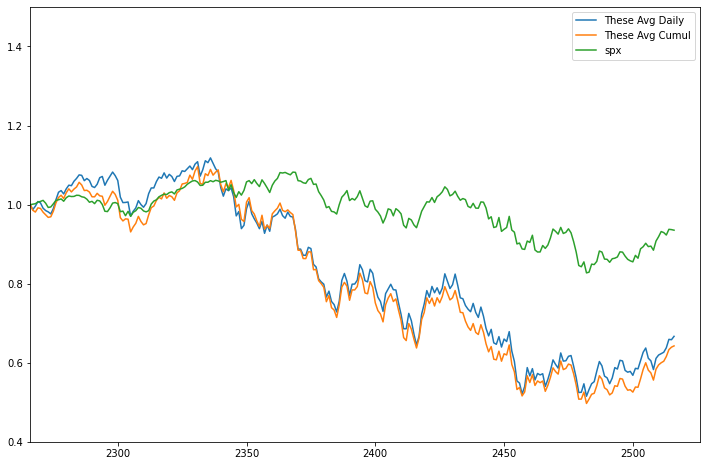

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.4, 1.5)
plt.legend();

In [14]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
1311,16.26,16.26,16.990,14.00,16.25,2.788708,1.000615,NaN,NaN
1312,15.26,15.26,16.399,15.12,16.10,2.725235,0.947826,0.938499,0.990160
1313,15.24,15.24,15.860,14.77,15.40,2.723924,0.989610,0.998689,1.009174
1314,13.73,13.73,15.430,13.62,15.10,2.619583,0.909271,0.900919,0.990814
1315,14.02,14.02,14.160,13.81,13.82,2.640485,1.014472,1.021122,1.006555


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
1311,16.26,16.26,16.990,14.00
1312,15.26,15.26,16.399,15.12
1313,15.24,15.24,15.860,14.77
1314,13.73,13.73,15.430,13.62
1315,14.02,14.02,14.160,13.81


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
1311,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889
1312,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890
1313,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701
1314,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827
1315,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308


0.05    0.987697
Name: HighMult, dtype: float64


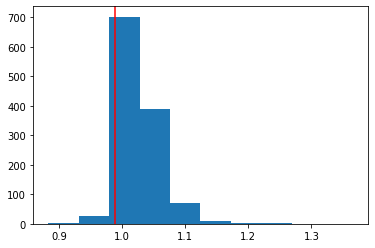

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0158564278328077


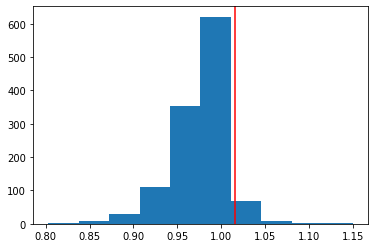

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.0158564278328077, 0.9876970965980841)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0082072090492469, 0.9940764553692383)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
1311,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889,0
1312,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890,0
1313,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701,0
1314,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827,0
1315,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308,0


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.0119202676368588,
 0.9873181784140886,
 1.0177439618628619,
 0.9880190723630928)

In [27]:
get_hilo_mults(aapl)

(1.0062769508204403,
 0.9955401271705285,
 1.0096450768498901,
 0.9922922994683565)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
             'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.006277,0.995540,1.009645,0.992292
1,ABMD,1.003945,0.997195,1.005067,0.996758
2,ABNB,1.009070,0.993660,1.012635,0.981947
3,ADBE,1.005020,0.995815,1.007071,0.994718
4,ADYEY,1.024488,0.979921,1.028975,0.966381


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,165.350006,AAPL
ABMD,291.5,ABMD
ABNB,117.110001,ABNB
ADBE,433.429993,ADBE
ADYEY,17.959999,ADYEY
...,...,...
ZEN,75.889999,ZEN
ZM,113.849998,ZM
^GSPC,4145.189941,^GSPC
^IXIC,12657.554688,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.006277,0.995540,1.009645,0.992292,165.350006
1,ABMD,1.003945,0.997195,1.005067,0.996758,291.5
2,ABNB,1.009070,0.993660,1.012635,0.981947,117.110001
3,ADBE,1.005020,0.995815,1.007071,0.994718,433.429993
4,ADYEY,1.024488,0.979921,1.028975,0.966381,17.959999


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv